In [ ]:
%matplotlib inline

# Monte Carlo, Aleatoriedade e Estatística

In [ ]:
import random

## `random.random`
Selecionando um número aleatório entre 0 e 1

In [ ]:
help(random.random)

In [ ]:
random.random()

In [ ]:
for _ in range(10):
    print(random.random())

Observe como rodar esse código várias vezes vai dar resultados diferentes todas as vezes - o mesmo vale para os exemplos a seguir

## `random.randint`

Selecionando um número inteiro numa faixa de números

In [ ]:
help(random.randint)

In [ ]:
for _ in range(10):
    print(random.randint(1, 1000))

## `random.choice`

Sorteando uma opção dentro de uma lista

In [ ]:
random.choice?

In [ ]:
opções_fds = ["Ficar em Casa", "Ir ao Shopping", "Ir num parque", "Viajar", "Visitar amigos", "Fazer uma festa em casa"]

for _ in range(3):
    print(random.choice(opções_fds))

In [ ]:
print(f"Nesse fim de semana vou: {random.choice(opções_fds)}")

## Sorteando Números que seguem alguma distribuição específica

Em estatística, podemos modelar fenômenos usando diversas distribuições diferentes - distribuição normal, de Poisson, Gama, etc. A biblioteca random permite sortear números que sigam uma distribuição em particular:

In [ ]:
random.gammavariate?

In [ ]:
random.normalvariate?

A melhor forma de exibir a diferença é fazendo um gráfico dos números sorteados por cada método:

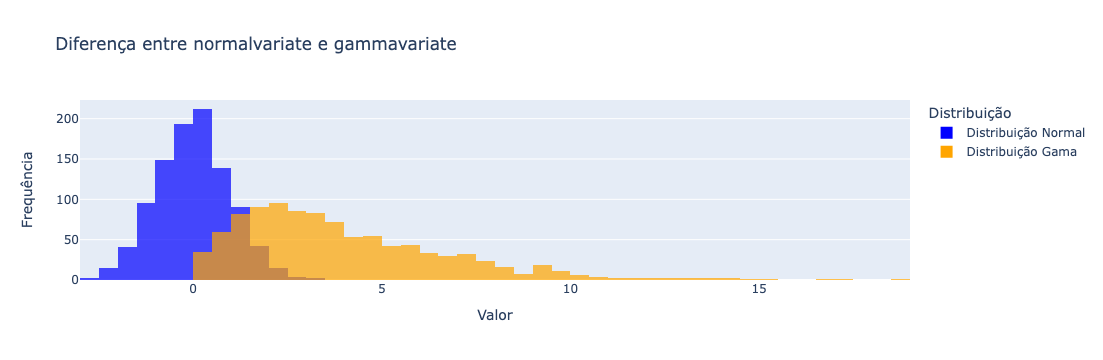

In [12]:
import random
import plotly.express as px

# Número de pontos para gerar
num_points = 1_000

# Gerar pontos usando normalvariate
normal_points = [random.normalvariate(0, 1) for _ in range(num_points)]

# Gerar pontos usando gammavariate
gamma_points = [random.gammavariate(2, 2) for _ in range(num_points)]

# Colocando os dados em um dicionário - isso vai colocar a
# chave do dicionário como legenda
data = {
    "Distribuição Normal": normal_points,
    "Distribuição Gama": gamma_points
}
# Criar uma figura interativa com Plotly
fig = px.histogram(
    data,
    labels={"x": "Valor"},
    title="Diferença entre normalvariate e gammavariate",
    opacity=0.7,
    color_discrete_sequence=["blue", "orange"],
    nbins=50,
    barmode="overlay"
)

# Personalizar o layout
fig.update_layout(
    xaxis_title="Valor",
    yaxis_title="Frequência",
    legend_title="Distribuição",
)

# Mostrar o gráfico interativo
fig.show()

# Monte Carlo

O Método de Monte Carlo é uma abordagem estatística poderosa para estimar resultados complexos por meio de amostragens aleatórias. Ele se baseia em simular um grande número de cenários aleatórios para calcular aproximações numéricas. Isso é especialmente útil quando resolver problemas analiticamente é desafiador ou inviável. O método é amplamente aplicado em diversas áreas, como física, engenharia, finanças e ciências biológicas, permitindo a obtenção de insights valiosos em situações complexas e ajudando a tomar decisões informadas.

## Exemplo 1 - Estimando o número de peixes de um lago

Imagine que eu tenho um lago com muitos peixes. No caso o lago é uma lista e os peixes são a letra 'p':

In [36]:
lago = ["p"] * random.randint(300, 500)

Aqui a gente sabe que o lago tem alguma coisa entre 300 e 500 peixes. Vamos "pescar" 20 peixes aleatoriamente e vamos "marcar" cada um dos peixes pescados com um "x" e então devolver pro lago:

In [37]:
peixes_marcados = 0
for i in range(20):
    pescado = random.randint(0, len(lago))
    if lago[pescado] == "x":
        print("Peixe já marcado, pulando")
        continue
    lago[pescado] = "x"
    peixes_marcados += 1

print(f"{peixes_marcados=}")

peixes_marcados=20


Agora, vamos pescar de novo 100 peixes e ver quantos peixes marcados aparecem:

In [38]:
amostra = random.sample(lago, 100) # Usando `sample` para obter a amostra!

Quantos peixes marcados vieram nessa amostra?

In [39]:
amostra.count("x")

5

Se nós marcamos 20 peixes no total, nós podemos comparar a porcentagem de peixes que vieram marcados na amostra e extrapolar para a população do lago todo, pois:


$$\frac{\text{peixes marcados}}{\text{total de peixes}} \simeq \frac{\text{peixes marcados na amostra}}{\text{total de peixes na amostra}}$$

Portanto:

$$\text{total de peixes} \simeq \frac{\text{peixes marcados}\cdot \text{total de peixes na amostra}}{\text{peixes marcados na amostra}}$$

In [42]:
estimativa = (peixes_marcados * 100) / amostra.count("x")
print(estimativa)

400.0


Qual era o tamanho real?

In [43]:
print(len(lago))

403


In [47]:
prec = estimativa/len(lago) * 100
print(f"A estimativa foi {prec:.4}% do valor real")

A estimativa foi 99.26% do valor real


## Exemplo 2 - Calculando Pi

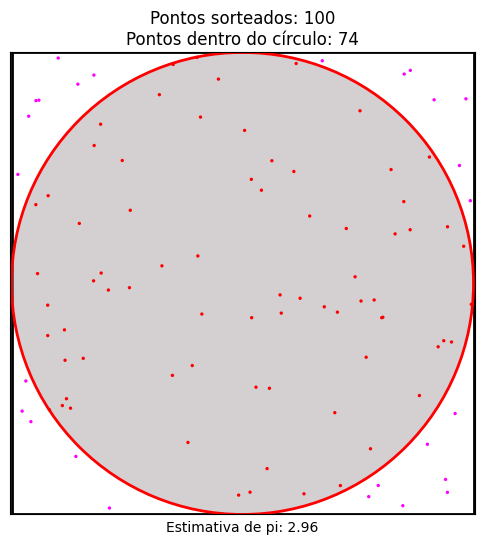

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import random
from IPython.display import HTML

def estimate_pi(points_total, points_in):
    """
    Dado o número total de pontos sorteados e o número
    de pontos dentro do círculo, estima o valor de pi
    """
    # Se o total é 0, não dá pra dividir por 0.
    # Retornando "0" como estimativa para evitar um erro
    if points_total == 0:
        return 0
    return (points_in / points_total) * 4


# Cria a figura do matplotlib
fig, ax = plt.subplots(figsize=(6, 6))

# Desenha um quadrado
square = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(square)

# Desenha um círculo
circle = patches.Circle((0.5, 0.5), 0.5, linewidth=2, edgecolor='red', facecolor='#a99fa47d')
ax.add_patch(circle)

# Configuras os limites dos eixos
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Define a proporção da figura como igual
ax.set_aspect('equal', adjustable='datalim')

# Retira os marcadores dos eixos
ax.set_xticks([])
ax.set_yticks([])

# Configura o título e label do eixo x
ax.set_title("Animating Points within Circle")
ax.set_xlabel('Estimativa de pi: ')

# Desenha um scatter plot vazio, com pontos de tamnho 2
sc = ax.scatter([], [], s=2)

points = []
colors = []
points_in = 0

def update_estimates():
    ax.set_title(f"Pontos sorteados: {len(points)}\nPontos dentro do círculo: {points_in}")
    pi_estimate = estimate_pi(len(points), points_in)
    ax.set_xlabel(f"Estimativa de pi: {pi_estimate}")
    
# Animation update function
def update(frame):
    global points_in
    x = random.random()
    y = random.random()

    points.append([x, y])
    
    # Checa se o ponto sorteado está dentro do círculo
    if ((x - 0.5)**2 + (y - 0.5)**2) <= 0.5**2:
        points_in += 1  # conta como dentro
        colors.append((1, 0,0))
    else:
        colors.append((1, 0, 1))
        
    sc.set_offsets(points)
    sc.set_facecolors(colors)

    # Atualiza a estimativa a cada 10 pontos
    if len(points) % 10 == 0:
        update_estimates()

update_estimates() # Atualiza uma última vez


# Create animation
ani = FuncAnimation(fig, update, frames=range(98), interval=100)

HTML(ani.to_html5_video())

Vamos fazer uma simulação mais completa - com mais pontos:

In [73]:
import random

num_points = 200 # Quantos pontos para sortear
estimates = [] # Vamos atualizar a estimativa a cada passo
inside_circle = 0

for i in range(num_points):
    x = random.random()
    y = random.random()

    if x**2 + y**2 <= 1:
        inside_circle += 1

    # se i = 0, não dá pra dividir por i
    if i == 0:
        estimate = 0 
    else:
        estimate = (inside_circle / i) * 4
    estimates.append(estimate)


print("Valor estimado:", estimate)

Valor estimado: 3.0954773869346734


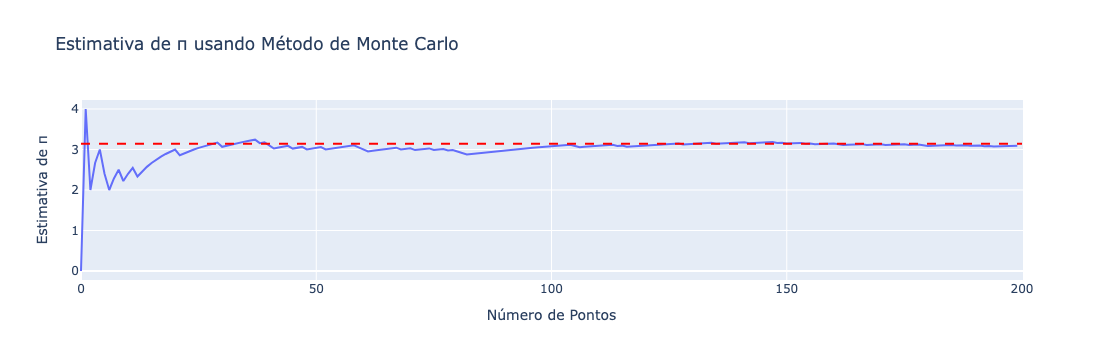

In [74]:
import plotly.graph_objects as go
# Valor real de pi
pi_real = 3.14159265358979323846

# Criar o gráfico de linha
fig = go.Figure()

# Adicionar os dados estimados
fig.add_trace(go.Scatter(x=list(range(num_points)), y=estimates, mode='lines', name='Estimativa de π'))

# Adicionar a linha horizontal para o valor real de pi
fig.add_shape(
    type='line',
    x0=0, y0=pi_real,
    x1=num_points, y1=pi_real,
    line=dict(color='red', dash='dash'),
    name='Valor Real de π'
)

# Configurar o layout
fig.update_layout(
    title="Estimativa de π usando Método de Monte Carlo",
    xaxis_title="Número de Pontos",
    yaxis_title="Estimativa de π",
)

# Mostrar o gráfico
fig.show()